<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import cv2
import numpy as np
import tensorflow

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt
folder_dir = '/content/drive/MyDrive/Flower recognition/flowers'

In [8]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

print(f"Folder directory: {folder_dir}")

# Print the contents of the directory
print(f"Directory contents: {os.listdir(folder_dir)}")

for folder in os.listdir(folder_dir):
    # Print the files in the subfolder
    print(f"Files in subfolder '{folder}': {os.listdir(os.path.join(folder_dir, folder))}")
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            # Print the shape of the loaded image
            print(f"Image shape: {img.shape}")
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

print(f"Number of images loaded: {len(data)}")

Folder directory: /content/drive/MyDrive/Flower recognition/flowers
Directory contents: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Files in subfolder 'daisy': ['107592979_aaa9cdfe78_m.jpg', '10712722853_5632165b04.jpg', '10559679065_50d2b16f6d.jpg', '10841136265_af473efc60.jpg', '10993818044_4c19b86c82.jpg', '105806915_a9c13e2106_n.jpg', '10770585085_4742b9dac3_n.jpg', '10993710036_2033222c91.jpg', '10437929963_bc13eebe0c.jpg', '10555826524_423eb8bf71_n.jpg', '10391248763_1d16681106_n.jpg', '10555749515_13a12a026e.jpg', '10466290366_cc72e33532.jpg', '10466558316_a7198b87e2.jpg', '10437754174_22ec990b77_m.jpg', '10437770546_8bb6f7bdd3_m.jpg', '1031799732_e7f4008c03.jpg', '10555815624_dc211569b0.jpg', '10140303196_b88d3d6cec.jpg', '10172567486_2748826a8b.jpg', '10172636503_21bededa75_n.jpg', '10172379554_b296050f82_n.jpg', '100080576_f52e8ee070_n.jpg', '102841525_bd6628ae3c.jpg', '10300722094_28fa978807_n.jpg', '13583238844_573df2de8e_m.jpg', '1374193928_a52320eafa.jpg', '13557

In [10]:
data_arr = np.array(data)
label_arr = np.array(label)

In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [12]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=5
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 907s 8s/step - accuracy: 0.4344 - loss: 1.3681 - val_accuracy: 0.4352 - val_loss: 1.3060
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 879s 8s/step - accuracy: 0.4444 - loss: 1.3160 - val_accuracy: 0.4259 - val_loss: 1.3501
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 902s 8s/step - accuracy: 0.4608 - loss: 1.2735 - val_accuracy: 0.5000 - val_loss: 1.1738
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 903s 8s/step - accuracy: 0.4951 - loss: 1.2182 - val_accuracy: 0.5370 - val_loss: 1.2010
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 905s 8s/step - accuracy: 0.5088 - loss: 1.1709 - val_accuracy: 0.5312 - val_loss: 1.2326


27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step


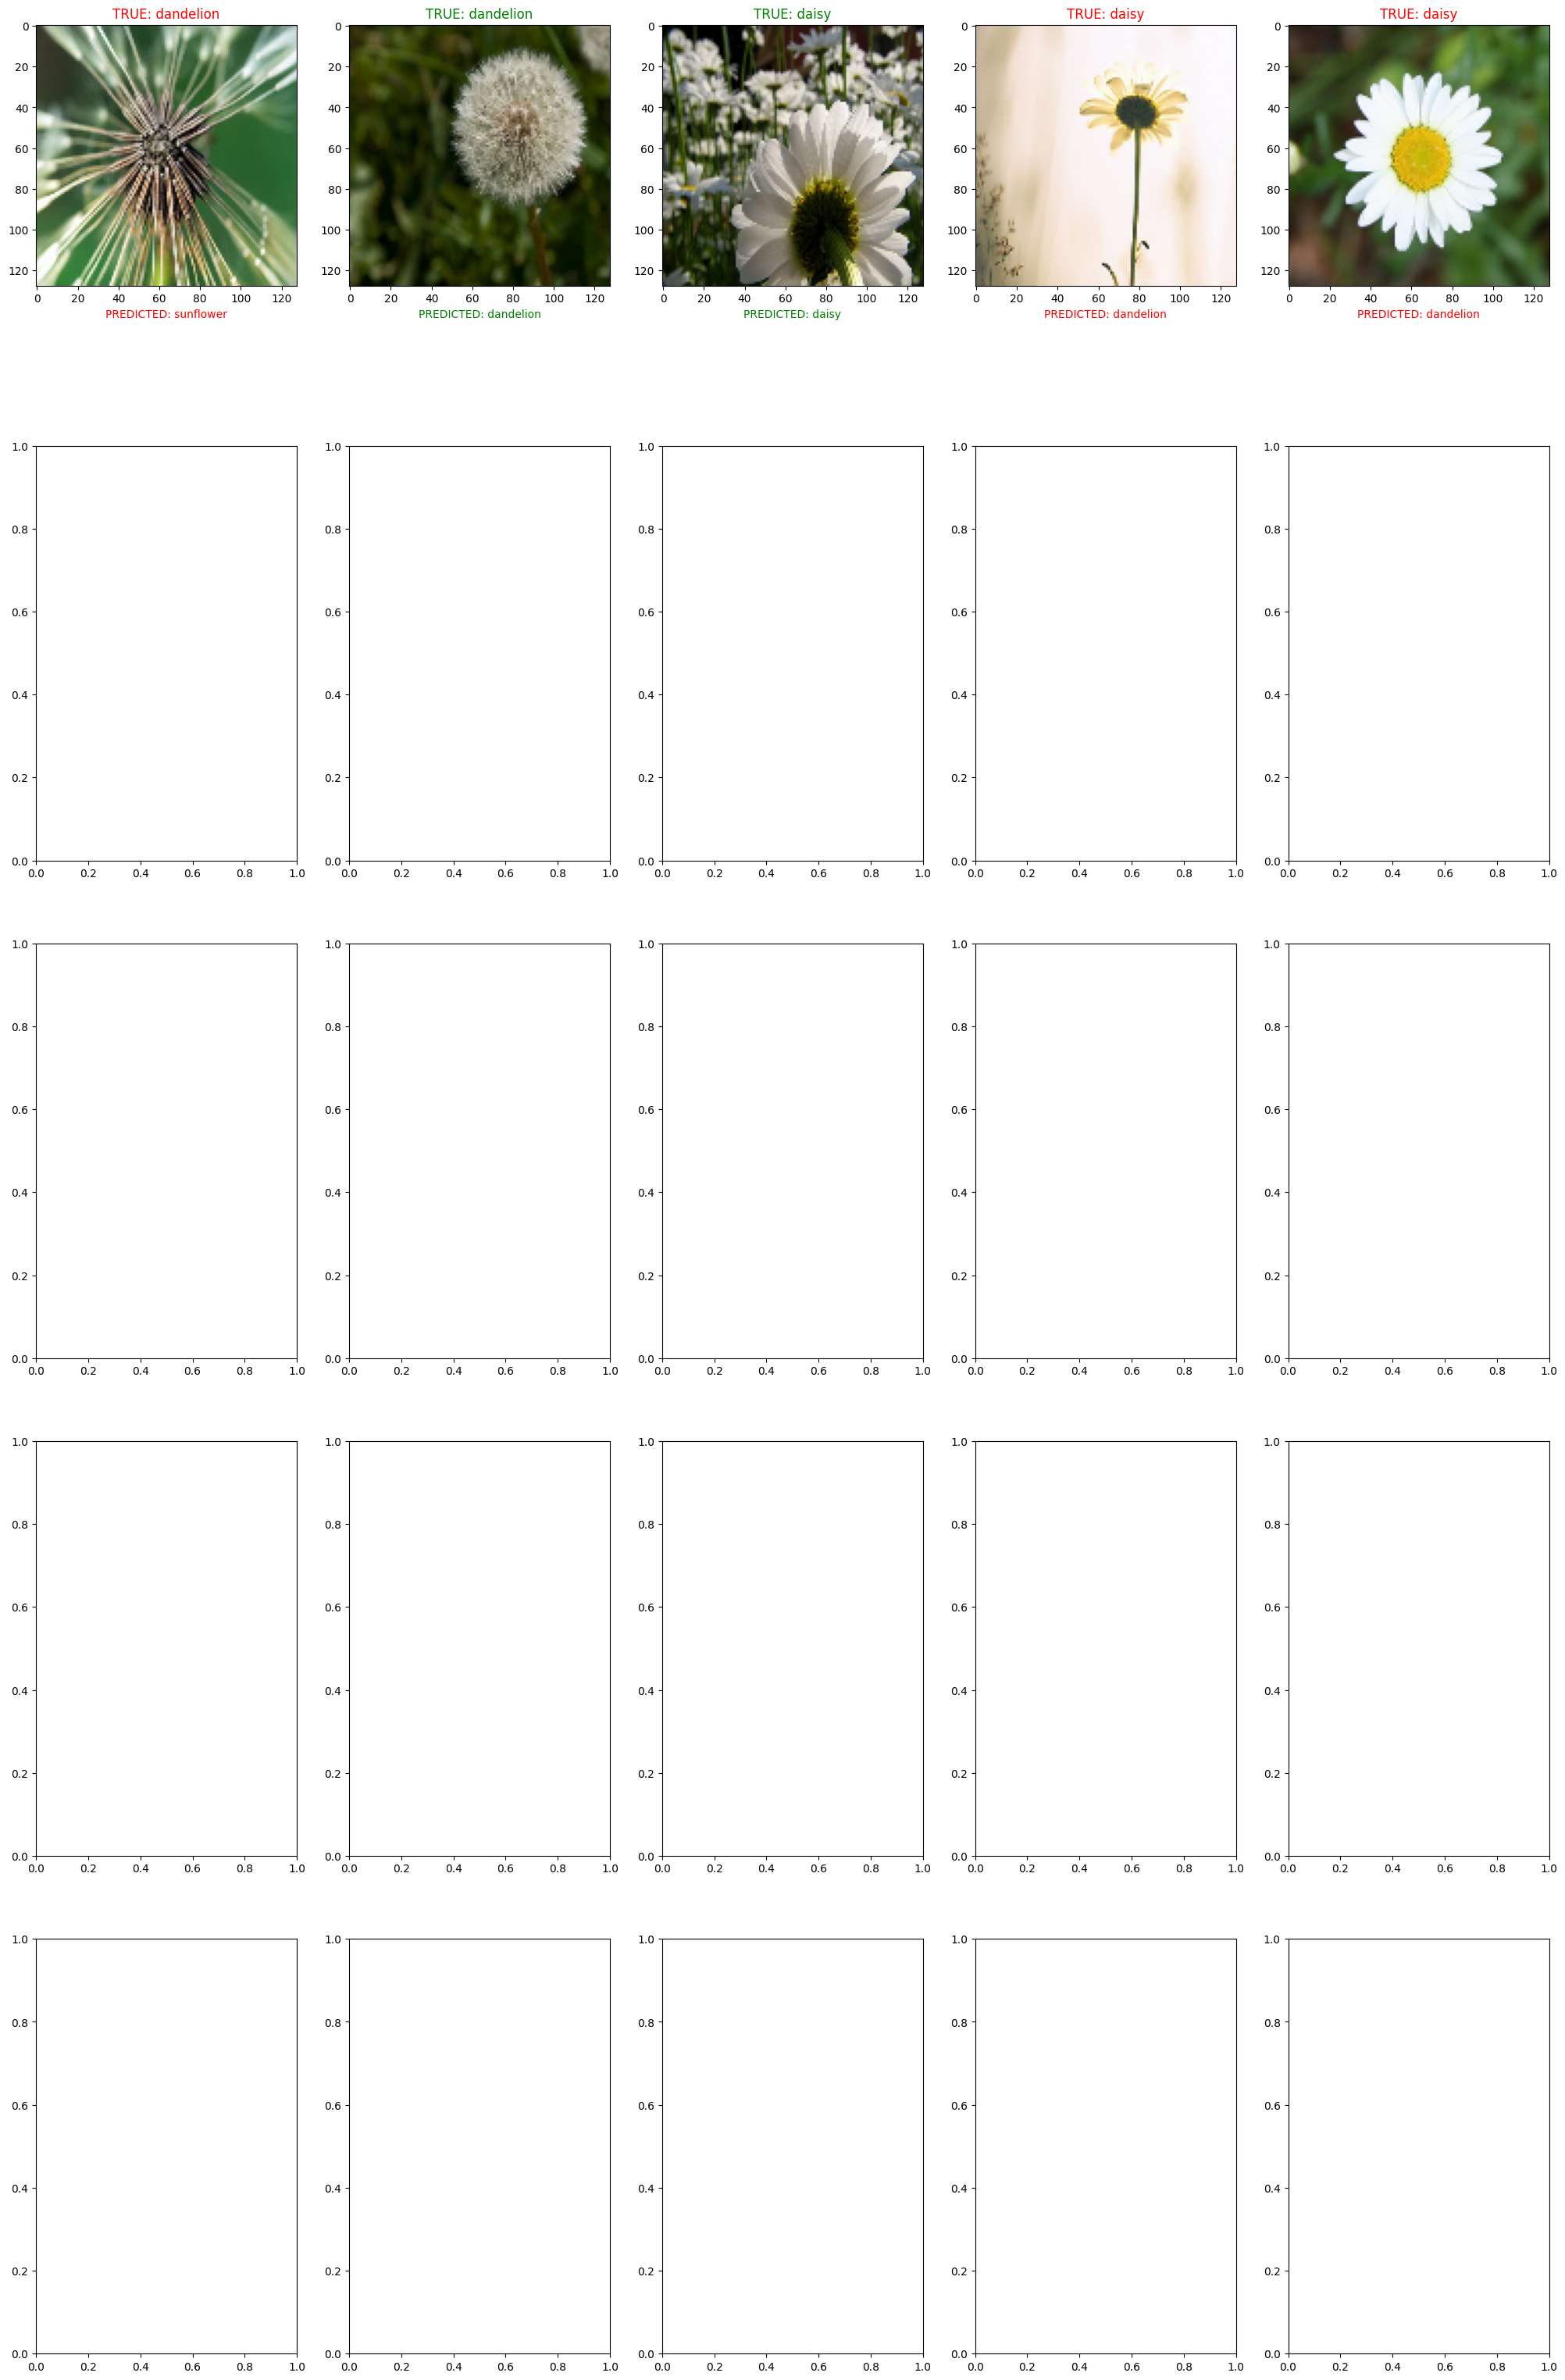

In [22]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(5, 5, figsize=(25, 40))  # Still 5x5 grid
count = 0

for i in range(5):
    for j in range(5):
        if count >= 5:  # Stop after 5 iterations
            break
        k = int(np.random.random_sample() * len(X_test))
        if categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        count += 1
    if count >= 5:
        break